In [1]:
import pandas as pd #For DataFrames
import numpy as np #Mathmatical Operations
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df=pd.read_excel('candyhierarchy2017.xlsx')

In [3]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [5]:
df.isnull().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

# First we need to clean our data

In [6]:
# we could drop the id column cuz it was necessary in the survey process but not that  necessary  in the analysing processs
df.drop(columns='Internal ID',inplace=True)
df.head()

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [7]:
df.columns

Index(['Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=119)

In [8]:
# to display all the cloumns
from IPython.display import display
pd.options.display.max_columns = None
display(df)

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,NaN

In [9]:

# we could drop q7 ,q8 ,q9 because the are text label filled by comment from the survei and not a specific answer
#df.drop(columns='Q7: JOY OTHER',inplace=True)
df.drop(['Q7: JOY OTHER','Q8: DESPAIR OTHER','Q9: OTHER COMMENTS','Unnamed: 113','Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'], axis=1, inplace=True)
df.head()


,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: DRESS,Q11: DAY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [11]:
df.columns

Index(['Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q6 | Trail Mix', 'Q6 | Twix',
       'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties',
       'Q10: DRESS', 'Q11: DAY'],
      dtype='object', length=110)

In [12]:
# modify our columns names (remove Q N)
df.rename(columns=lambda x: x[3:], inplace=True)

In [13]:
# well it works ^^
df.columns

Index([' GOING OUT?', ' GENDER', ' AGE', ' COUNTRY',
       ' STATE, PROVINCE, COUNTY, ETC', '| 100 Grand Bar',
       '| Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       '| Any full-sized candy bar', '| Black Jacks', '| Bonkers (the candy)',
       ...
       '| Trail Mix', '| Twix',
       '| Vials of pure high fructose corn syrup, for main-lining into your vein',
       '| Vicodin', '| Whatchamacallit Bars', '| White Bread',
       '| Whole Wheat anything', '| York Peppermint Patties', ': DRESS',
       ': DAY'],
      dtype='object', length=110)

In [14]:
df

,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",| 100 Grand Bar,| Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),| Any full-sized candy bar,| Black Jacks,| Bonkers (the candy),| Bonkers (the board game),| Bottle Caps,| Box'o'Raisins,| Broken glow stick,| Butterfinger,| Cadbury Creme Eggs,| Candy Corn,| Candy that is clearly just the stuff given out for free at restaurants,| Caramellos,"| Cash, or other forms of legal tender",| Chardonnay,| Chick-o-Sticks (we don’t know what that is),| Chiclets,| Coffee Crisp,| Creepy Religious comics/Chick Tracts,| Dental paraphenalia,| Dots,| Dove Bars,| Fuzzy Peaches,| Generic Brand Acetaminophen,| Glow sticks,| Goo Goo Clusters,| Good N' Plenty,| Gum from baseball cards,| Gummy Bears straight up,| Hard Candy,| Healthy Fruit,| Heath Bar,| Hershey's Dark Chocolate,| Hershey’s Milk Chocolate,| Hershey's Kisses,| Hugs (actual physical hugs),| Jolly Rancher (bad flavor),| Jolly Ranchers (good flavor),| JoyJoy (Mit Iodine!),| Junior Mints,| Senior Mints,| Kale smoothie,| Kinder Happy Hippo,| Kit Kat,| LaffyTaffy,| LemonHeads,| Licorice (not black),| Licorice (yes black),| Lindt Truffle,| Lollipops,| Mars,| Maynards,| Mike and Ike,| Milk Duds,| Milky Way,| Regular M&Ms,| Peanut M&M’s,| Blue M&M's,| Red M&M's,| Green Party M&M's,| Independent M&M's,| Abstained from M&M'ing.,| Minibags of chips,| Mint Kisses,| Mint Juleps,| Mr. Goodbar,| Necco Wafers,| Nerds,| Nestle Crunch,| Now'n'Laters,| Peeps,| Pencils,| Pixy Stix,| Real Housewives of Orange County Season 9 Blue-Ray,| Reese’s Peanut Butter Cups,| Reese's Pieces,| Reggie Jackson Bar,| Rolos,| Sandwich-sized bags filled with BooBerry Crunch,| Skittles,| Smarties (American),| Smarties (Commonwealth),| Snickers,| Sourpatch Kids (i.e. abominations of nature),| Spotted Dick,| Starburst,| Sweet Tarts,| Swedish Fish,| Sweetums (a friend to diabetes),| Take 5,| Tic Tacs,| Those odd marshmallow circus peanut things,| Three Musketeers,| Tolberone something or other,| Trail Mix,| Twix,"| Vials of pure high fructose corn syrup, for main-lining into your vein",| Vicodin,| Whatchamacallit Bars,| White Bread,| Whole Wheat anything,| York Peppermint Patties,: DRESS,: DAY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR

In [15]:
df[' GOING OUT?'].isnull().sum()

110

In [16]:
# we need to figure out is YES> NO or the opposite before fill it  
df[' GOING OUT?'].value_counts()
# so now we could fill the null with no 

No     2038
Yes     312
Name:  GOING OUT?, dtype: int64

In [17]:
#fill NaN with  No 
df[' GOING OUT?']=df[' GOING OUT?'].fillna("No")

In [18]:
# it works ^^
df[' GOING OUT?'].isnull().sum()

0

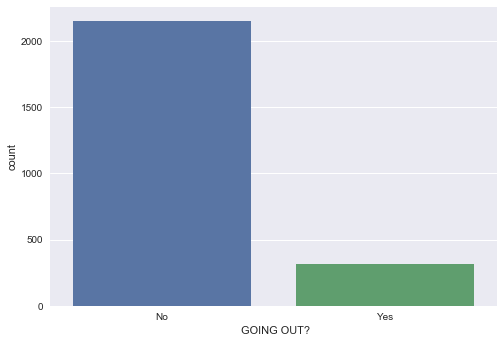

In [19]:
# lets visulaize it 
sns.countplot(df[' GOING OUT?'],data=df)
    

In [20]:
#' GENDER'
df[' GENDER'].isnull().sum()


41

In [21]:
df[' GENDER'].value_counts()
# so we could fill the NaN with Male

Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name:  GENDER, dtype: int64

In [22]:
df[' GENDER']=df[' GENDER'].fillna("Male")

In [23]:
# it works ^^
df[' GENDER'].isnull().sum()

0

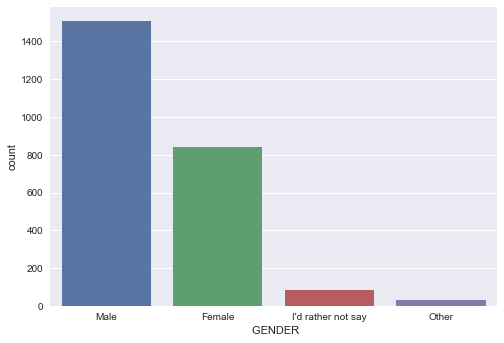

In [24]:
# lets visulaize it 
sns.countplot(df[' GENDER'],data=df)
# we could easliy see that males are more than female 
# the non male and female options are also less than 200 togother
    

In [25]:
df[' AGE'].isnull().sum()

84

In [26]:
# age is quantitative variables so to analise it we will use histogram
# but first we need all values to be numeric



In [27]:
pd.to_numeric(df[' AGE'], errors ='coerce')

0        NaN
1       44.0
2       49.0
3       40.0
4       23.0
        ... 
2455    24.0
2456    33.0
2457    26.0
2458    58.0
2459    66.0
Name:  AGE, Length: 2460, dtype: float64

In [28]:
df[' AGE']

0       NaN
1        44
2        49
3        40
4        23
       ... 
2455     24
2456     33
2457     26
2458     58
2459     66
Name:  AGE, Length: 2460, dtype: object

In [29]:
# lets fill the null age with 00.00 
df[' AGE']=df[' AGE'].fillna(00.00)


In [30]:
# nice it works ^^
df[' AGE'].isnull().sum()

0

In [31]:

#df[' AGE'] = df[' AGE'].astype('float64') 
#didint work due string values exist in the data

In [32]:
df[' AGE'].value_counts()

40                92
34                90
37                89
43                86
0.0               84
                  ..
See question 2     1
24-50              1
MY NAME JEFF       1
Old enough         1
ancient            1
Name:  AGE, Length: 107, dtype: int64

In [33]:
#df.plot(kind="hist",y=' AGE')


In [34]:
# we need to replace the strint values first
df[' AGE'].replace("Old enough",00.00,inplace = True)

In [35]:
 df[' AGE'].replace("sixty-nine ",00.00,inplace = True)

In [36]:
 df[' AGE'].replace(312 ,00.00,inplace = True)

In [37]:
 df[' AGE'].replace("60+",00.00,inplace = True)

In [38]:
 df[' AGE'].replace("?",00.00,inplace = True)

In [39]:
df[' AGE'].value_counts()

40                               92
34                               90
37                               89
0.0                              88
43                               86
                                 ..
Enough                            1
59 on the day after Halloween     1
older than dirt                   1
24-50                             1
ancient                           1
Name:  AGE, Length: 103, dtype: int64

In [40]:
df[' AGE'].replace('46 Halloweens.' ,00.00,inplace = True)

In [41]:
 df[' AGE'].replace('hahahahaha ',00.00,inplace = True)

In [42]:
df[' AGE'].replace('sixty-nine',00.00,inplace = True)

In [43]:
df[' AGE'].replace('no',00.00,inplace = True)

In [44]:
df[' AGE'].replace('45-55',00.00,inplace = True)

In [45]:
df[' AGE'].unique()

array([0.0, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19, 57, 60,
       66, 12, 'Many', 55, 72, 21, 11, 9, 68, 20, 6, 10, 71, 90, 13, 99,
       7, 'hahahahaha', 88, 39.4, 74, 102, 'older than dirt', 17, 15, 8,
       75, '5u', 'Enough', 'See question 2', '24-50', 14, 'Over 50', 100,
       76, 1000, 'ancient', 77, 'OLD', 'old', 73, 70.5, 1, 'MY NAME JEFF',
       4, '59 on the day after Halloween', 'old enough', 'your mom',
       'I can remember when Java was a cool new language'], dtype=object)

In [46]:
df[' AGE'].replace('Many',00.00,inplace = True)

In [47]:
df[' AGE'].replace('hahahahaha',00.00,inplace = True)

In [48]:
df[' AGE'].replace('older than dirt',00.00,inplace = True)

In [49]:
df[' AGE'].replace('5u',00.00,inplace = True)

In [50]:
df[' AGE'].replace('Enough',00.00,inplace = True)

In [51]:
df[' AGE'].replace('See question 2',00.00,inplace = True)

In [52]:
df[' AGE'].replace('24-50',00.00,inplace = True)

In [53]:
df[' AGE'].replace('Over 50',00.00,inplace = True)

In [54]:
# replace 1000 for being incorect answer may lead to an outlier
df[' AGE'].replace(1000,00.00,inplace = True)
    

In [55]:
df[' AGE'].replace('ancient',00.00,inplace = True)

In [56]:
df[' AGE'].replace('OLD',00.00,inplace = True)

In [57]:
df[' AGE'].replace('old',00.00,inplace = True)

In [58]:
df[' AGE'].replace('MY NAME JEFF',00.00,inplace = True)

In [59]:
df[' AGE'].replace('59 on the day after Halloween',00.00,inplace = True)

In [60]:
df[' AGE'].replace( 'old enough',00.00,inplace = True)

In [61]:
df[' AGE'].replace('your mom',00.00,inplace = True)

In [62]:
df[' AGE'].replace('I can remember when Java was a cool new language',00.00,inplace = True)

In [63]:
# finallllly we finsh cleaning age :""D

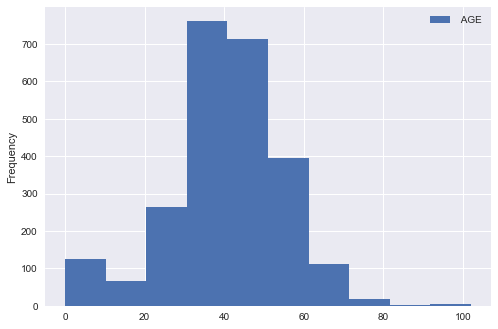

In [64]:
df.plot(kind="hist",y=' AGE')
# we could easliy see that it follow a normal distrubtion "bell shaped curve"
#the peak of age is around 30:40


In [65]:
df[ ' COUNTRY'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [66]:
# yes oaky  USA USA we get it -____ -
# now we need to clean this so we could visulatize it 

In [67]:
df[ ' COUNTRY'].replace(['USA ','us'],'USA',inplace = True)

In [68]:
df[ ' COUNTRY'].unique()

array([nan, 'USA', 'usa', 'canada', 'Canada', 'Us', 'US', 'Murica',
       'United States', 'uk', 'United Kingdom', 'united states', 'Usa',
       'United States ', 'United staes', 'United States of America',
       'UAE', 'England', 'UK', 'canada ', 'Mexico', 'United states',
       'u.s.a.', 'USAUSAUSA', 'america', 35, 'france',
       'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 'California', 

In [69]:
df[ ' COUNTRY'].replace(['US', 'Earth','Costa Rica', 'cascadia','New York','Scotland', 'Scotland '],'USA',inplace = True)

In [70]:
df[ ' COUNTRY'].replace(['Unied States','United Sates','California','USa','I pretend to be from Canada, but I am really from the United States.'],'USA',inplace = True)

In [71]:
df[ ' COUNTRY'].replace(['Usa ','United Stated','Ahem....Amerca','UD','New Jersey','United ststes','America','United Statss','Atlantis','USA! USA! USA!', 'USAA', 'Alaska', 'united States '],'USA',inplace = True)

In [72]:
df[ ' COUNTRY'].replace(['USA USA USA!!!!', "I don't know anymore", 'Fear and Loathing','subscribe to dm4uz3 on youtube', 'U.S. ', 'Narnia', 'u s a', 'United Statea', 'united ststes', 1,'USSA','N. America'],'USA',inplace = True)

In [73]:
df[ ' COUNTRY'].replace(['usa','Us','United States','united states','Usa','United States ','United staes','United States of America', 'UAE'],'USA',inplace = True)

In [74]:
df[ ' COUNTRY'].replace(['United states', 'u.s.a.','USAUSAUSA','america',35, 'United States of America ','U.S.A.'],'USA',inplace = True)

In [75]:
df[ ' COUNTRY'].replace(['united states of america','US of A','Unites States','The United States','North Carolina ','Unied States''Earth', 'U S', 'u.s.','The United States of America',
       'unite states', 'U.S.', 46,],'USA',inplace = True)

In [76]:
df[ ' COUNTRY'].replace([ 'USA? Hard to tell anymore..', "'merica", 'usas', 'Pittsburgh', 45,'United State', 32, 'A', 'Can', 'Canae'
],'USA',inplace = True)

In [77]:
# FINLLLY WE FINSH clenning USA values -________- 
# obviously we could replace the nan value with USA

df[ ' COUNTRY']=df[ ' COUNTRY'].fillna('USA')


In [78]:
# lest fix uk values

In [79]:
df[ ' COUNTRY'].unique()

array(['USA', 'canada', 'Canada', 'Murica', 'uk', 'United Kingdom',
       'England', 'UK', 'canada ', 'Mexico', 'france', 'finland',
       'unhinged states', 'Canada ', 'Netherlands', 'germany', 'Europe',
       'U.K. ', 'Australia', 'insanity lately', 'Greece', 'France',
       'australia', 'Trumpistan', 'Ireland', 'Korea', 'Japan',
       'South africa', 'Uk', 'Iceland', 'Germany', 'Canada`', 'UK ',
       'Denmark', 'France ', 'Switzerland', 'South Korea', 'CANADA',
       'Indonesia', 'The Netherlands', 'endland', 'murrika',
       'soviet canuckistan', 'Singapore', 'China', 'Taiwan', 'Ireland ',
       'hong kong', 'spain', 'Sweden', 'Hong Kong', 'United kingdom'],
      dtype=object)

In [80]:
df[ ' COUNTRY'].replace(['uk', 'United Kingdom','England', 'UK', 'U.K. ','Uk','Iceland','Uk','Iceland','UK ','United kingdom'],'UK',inplace = True)

In [81]:
# lets fix canda 
df[ ' COUNTRY'].replace(['canada', 'Canada','canada ','Canada ','Canada`','CANADA'],'Canada',inplace = True)

In [82]:
#lets fix farnce 
df[ ' COUNTRY'].replace(['france','France ',],'France',inplace = True)


In [83]:
# lets fix Austrlia
df[ ' COUNTRY'].replace('australia','Australia',inplace = True)


In [84]:
df[ ' COUNTRY'].replace( 'germany','Germany',inplace = True)

In [85]:
#lets fix china
df[ ' COUNTRY'].replace(['Hong Kong','hong kong'] ,'China',inplace = True)

In [86]:
# all set ^^ we finsh cleaning country now we could visulaize it 

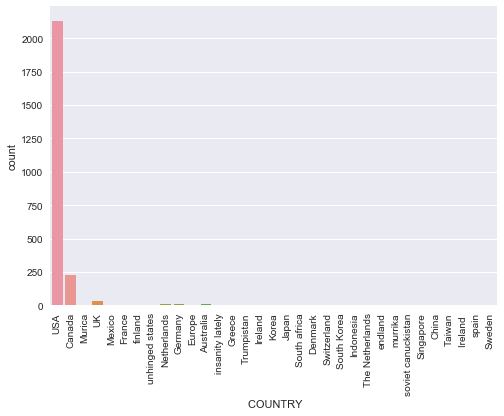

In [87]:
sns.countplot(df[ ' COUNTRY'],data=df)
plt.xticks(rotation=90)
plt.show()
# we could see that USA is most frequan country 
# canda is the second one then UK 
# the rest countrys  too little or just 1 so it will be hard to see it 

In [88]:
# we could drop the state columns it doesnt give us useful info
df.drop([ ' STATE, PROVINCE, COUNTY, ETC'], axis=1, inplace=True)

In [89]:
df

,GOING OUT?,GENDER,AGE,COUNTRY,| 100 Grand Bar,| Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),| Any full-sized candy bar,| Black Jacks,| Bonkers (the candy),| Bonkers (the board game),| Bottle Caps,| Box'o'Raisins,| Broken glow stick,| Butterfinger,| Cadbury Creme Eggs,| Candy Corn,| Candy that is clearly just the stuff given out for free at restaurants,| Caramellos,"| Cash, or other forms of legal tender",| Chardonnay,| Chick-o-Sticks (we don’t know what that is),| Chiclets,| Coffee Crisp,| Creepy Religious comics/Chick Tracts,| Dental paraphenalia,| Dots,| Dove Bars,| Fuzzy Peaches,| Generic Brand Acetaminophen,| Glow sticks,| Goo Goo Clusters,| Good N' Plenty,| Gum from baseball cards,| Gummy Bears straight up,| Hard Candy,| Healthy Fruit,| Heath Bar,| Hershey's Dark Chocolate,| Hershey’s Milk Chocolate,| Hershey's Kisses,| Hugs (actual physical hugs),| Jolly Rancher (bad flavor),| Jolly Ranchers (good flavor),| JoyJoy (Mit Iodine!),| Junior Mints,| Senior Mints,| Kale smoothie,| Kinder Happy Hippo,| Kit Kat,| LaffyTaffy,| LemonHeads,| Licorice (not black),| Licorice (yes black),| Lindt Truffle,| Lollipops,| Mars,| Maynards,| Mike and Ike,| Milk Duds,| Milky Way,| Regular M&Ms,| Peanut M&M’s,| Blue M&M's,| Red M&M's,| Green Party M&M's,| Independent M&M's,| Abstained from M&M'ing.,| Minibags of chips,| Mint Kisses,| Mint Juleps,| Mr. Goodbar,| Necco Wafers,| Nerds,| Nestle Crunch,| Now'n'Laters,| Peeps,| Pencils,| Pixy Stix,| Real Housewives of Orange County Season 9 Blue-Ray,| Reese’s Peanut Butter Cups,| Reese's Pieces,| Reggie Jackson Bar,| Rolos,| Sandwich-sized bags filled with BooBerry Crunch,| Skittles,| Smarties (American),| Smarties (Commonwealth),| Snickers,| Sourpatch Kids (i.e. abominations of nature),| Spotted Dick,| Starburst,| Sweet Tarts,| Swedish Fish,| Sweetums (a friend to diabetes),| Take 5,| Tic Tacs,| Those odd marshmallow circus peanut things,| Three Musketeers,| Tolberone something or other,| Trail Mix,| Twix,"| Vials of pure high fructose corn syrup, for main-lining into your vein",| Vicodin,| Whatchamacallit Bars,| White Bread,| Whole Wheat anything,| York Peppermint Patties,: DRESS,: DAY
0,No,Male,0.0,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44.0,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,No,Male,49.0,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40.0,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DES

In [90]:
# lets clean the dress column
df[': DRESS'].value_counts()


White and gold    1081
Blue and black     635
Name: : DRESS, dtype: int64

In [91]:
df[': DRESS'].unique()


array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [92]:
df[': DRESS'].isnull().sum()

744

In [93]:
# we couldnot fill the NaN value with White and gold  cauze the null valuse are more than the other choice (blue and black)
# so fulling it will be misleading 
# so droping it is better 
### drop na better
df.dropna(subset=[': DRESS'],inplace=True)


In [94]:
#it works ^^
df[': DRESS'].isnull().sum()


0

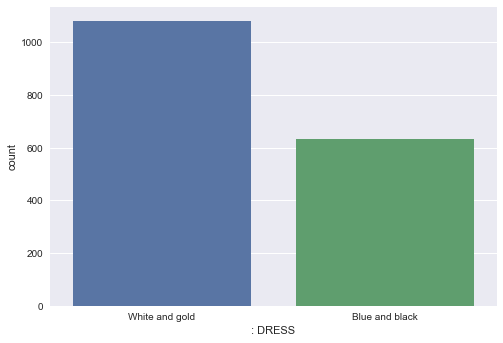

In [95]:
# visualize it into count Plot
sns.countplot(df[': DRESS'],data=df)
# we could see that the white and gold dress is more than the blue and black


In [96]:
df[': DAY'].value_counts()

Friday    1076
Sunday     634
Name: : DAY, dtype: int64

In [97]:
df[': DAY'].isnull().sum()

6

In [98]:
# we could fill it with Friday 
df[': DAY']=df[': DAY'].fillna('Friday')


In [99]:
# it works ^^
df[': DAY'].isnull().sum()

0

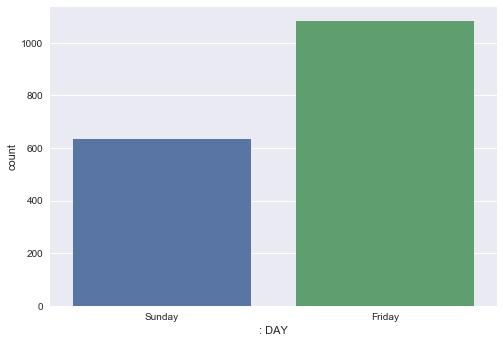

In [100]:
# lets visulalize it 
sns.countplot(df[': DAY'],data=df)
# we could see that "friday" is more than "sundary"


In [101]:
df

,GOING OUT?,GENDER,AGE,COUNTRY,| 100 Grand Bar,| Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),| Any full-sized candy bar,| Black Jacks,| Bonkers (the candy),| Bonkers (the board game),| Bottle Caps,| Box'o'Raisins,| Broken glow stick,| Butterfinger,| Cadbury Creme Eggs,| Candy Corn,| Candy that is clearly just the stuff given out for free at restaurants,| Caramellos,"| Cash, or other forms of legal tender",| Chardonnay,| Chick-o-Sticks (we don’t know what that is),| Chiclets,| Coffee Crisp,| Creepy Religious comics/Chick Tracts,| Dental paraphenalia,| Dots,| Dove Bars,| Fuzzy Peaches,| Generic Brand Acetaminophen,| Glow sticks,| Goo Goo Clusters,| Good N' Plenty,| Gum from baseball cards,| Gummy Bears straight up,| Hard Candy,| Healthy Fruit,| Heath Bar,| Hershey's Dark Chocolate,| Hershey’s Milk Chocolate,| Hershey's Kisses,| Hugs (actual physical hugs),| Jolly Rancher (bad flavor),| Jolly Ranchers (good flavor),| JoyJoy (Mit Iodine!),| Junior Mints,| Senior Mints,| Kale smoothie,| Kinder Happy Hippo,| Kit Kat,| LaffyTaffy,| LemonHeads,| Licorice (not black),| Licorice (yes black),| Lindt Truffle,| Lollipops,| Mars,| Maynards,| Mike and Ike,| Milk Duds,| Milky Way,| Regular M&Ms,| Peanut M&M’s,| Blue M&M's,| Red M&M's,| Green Party M&M's,| Independent M&M's,| Abstained from M&M'ing.,| Minibags of chips,| Mint Kisses,| Mint Juleps,| Mr. Goodbar,| Necco Wafers,| Nerds,| Nestle Crunch,| Now'n'Laters,| Peeps,| Pencils,| Pixy Stix,| Real Housewives of Orange County Season 9 Blue-Ray,| Reese’s Peanut Butter Cups,| Reese's Pieces,| Reggie Jackson Bar,| Rolos,| Sandwich-sized bags filled with BooBerry Crunch,| Skittles,| Smarties (American),| Smarties (Commonwealth),| Snickers,| Sourpatch Kids (i.e. abominations of nature),| Spotted Dick,| Starburst,| Sweet Tarts,| Swedish Fish,| Sweetums (a friend to diabetes),| Take 5,| Tic Tacs,| Those odd marshmallow circus peanut things,| Three Musketeers,| Tolberone something or other,| Trail Mix,| Twix,"| Vials of pure high fructose corn syrup, for main-lining into your vein",| Vicodin,| Whatchamacallit Bars,| White Bread,| Whole Wheat anything,| York Peppermint Patties,: DRESS,: DAY
1,No,Male,44.0,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
3,No,Male,40.0,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
4,No,Male,23.0,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DES

In [102]:
# we need to drop the nan rows to make analysing Q6 columns easier 
# we have already cleaning the rest of the columns we interstined in
# so droping rows wont affect it 
# and amke it into new df will be better
new_df = df.dropna(axis = 0, how ='any')
new_df
# we could see that the rows in df is 1716
# but now the rows in new_df is 975
# so it works

,GOING OUT?,GENDER,AGE,COUNTRY,| 100 Grand Bar,| Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),| Any full-sized candy bar,| Black Jacks,| Bonkers (the candy),| Bonkers (the board game),| Bottle Caps,| Box'o'Raisins,| Broken glow stick,| Butterfinger,| Cadbury Creme Eggs,| Candy Corn,| Candy that is clearly just the stuff given out for free at restaurants,| Caramellos,"| Cash, or other forms of legal tender",| Chardonnay,| Chick-o-Sticks (we don’t know what that is),| Chiclets,| Coffee Crisp,| Creepy Religious comics/Chick Tracts,| Dental paraphenalia,| Dots,| Dove Bars,| Fuzzy Peaches,| Generic Brand Acetaminophen,| Glow sticks,| Goo Goo Clusters,| Good N' Plenty,| Gum from baseball cards,| Gummy Bears straight up,| Hard Candy,| Healthy Fruit,| Heath Bar,| Hershey's Dark Chocolate,| Hershey’s Milk Chocolate,| Hershey's Kisses,| Hugs (actual physical hugs),| Jolly Rancher (bad flavor),| Jolly Ranchers (good flavor),| JoyJoy (Mit Iodine!),| Junior Mints,| Senior Mints,| Kale smoothie,| Kinder Happy Hippo,| Kit Kat,| LaffyTaffy,| LemonHeads,| Licorice (not black),| Licorice (yes black),| Lindt Truffle,| Lollipops,| Mars,| Maynards,| Mike and Ike,| Milk Duds,| Milky Way,| Regular M&Ms,| Peanut M&M’s,| Blue M&M's,| Red M&M's,| Green Party M&M's,| Independent M&M's,| Abstained from M&M'ing.,| Minibags of chips,| Mint Kisses,| Mint Juleps,| Mr. Goodbar,| Necco Wafers,| Nerds,| Nestle Crunch,| Now'n'Laters,| Peeps,| Pencils,| Pixy Stix,| Real Housewives of Orange County Season 9 Blue-Ray,| Reese’s Peanut Butter Cups,| Reese's Pieces,| Reggie Jackson Bar,| Rolos,| Sandwich-sized bags filled with BooBerry Crunch,| Skittles,| Smarties (American),| Smarties (Commonwealth),| Snickers,| Sourpatch Kids (i.e. abominations of nature),| Spotted Dick,| Starburst,| Sweet Tarts,| Swedish Fish,| Sweetums (a friend to diabetes),| Take 5,| Tic Tacs,| Those odd marshmallow circus peanut things,| Three Musketeers,| Tolberone something or other,| Trail Mix,| Twix,"| Vials of pure high fructose corn syrup, for main-lining into your vein",| Vicodin,| Whatchamacallit Bars,| White Bread,| Whole Wheat anything,| York Peppermint Patties,: DRESS,: DAY
1,No,Male,44.0,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
3,No,Male,40.0,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
8,No,Male,40.0,Canada,JOY,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,

In [103]:
list=df.columns

In [104]:
list

Index([' GOING OUT?', ' GENDER', ' AGE', ' COUNTRY', '| 100 Grand Bar',
       '| Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       '| Any full-sized candy bar', '| Black Jacks', '| Bonkers (the candy)',
       '| Bonkers (the board game)',
       ...
       '| Trail Mix', '| Twix',
       '| Vials of pure high fructose corn syrup, for main-lining into your vein',
       '| Vicodin', '| Whatchamacallit Bars', '| White Bread',
       '| Whole Wheat anything', '| York Peppermint Patties', ': DRESS',
       ': DAY'],
      dtype='object', length=109)

In [105]:
# now we first need to slice it into Q6 columns only
list=list[4:-2]

In [110]:
# it works , list lenght was 109 now 103
list

Index(['| 100 Grand Bar',
       '| Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       '| Any full-sized candy bar', '| Black Jacks', '| Bonkers (the candy)',
       '| Bonkers (the board game)', '| Bottle Caps', '| Box'o'Raisins',
       '| Broken glow stick', '| Butterfinger',
       ...
       '| Three Musketeers', '| Tolberone something or other', '| Trail Mix',
       '| Twix',
       '| Vials of pure high fructose corn syrup, for main-lining into your vein',
       '| Vicodin', '| Whatchamacallit Bars', '| White Bread',
       '| Whole Wheat anything', '| York Peppermint Patties'],
      dtype='object', length=103)

In [ ]:
# lest visulaize rondom candys and see have it behave

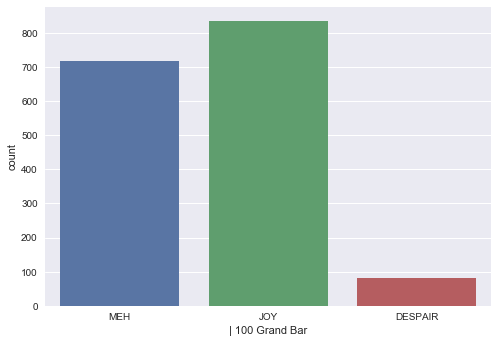

In [119]:
sns.countplot(df['| 100 Grand Bar'],data=df)

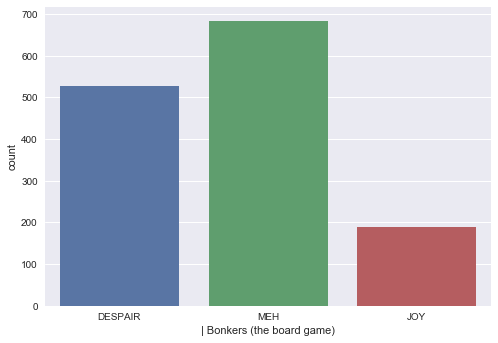

In [120]:

sns.countplot(df['| Bonkers (the board game)'],data=df)


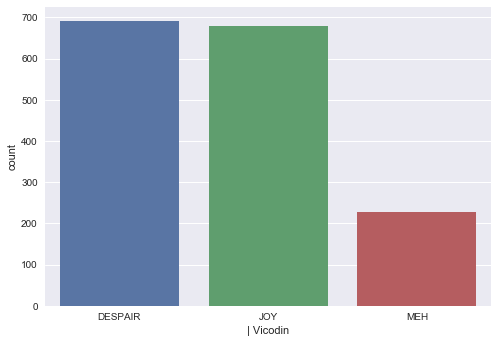

In [121]:
sns.countplot(df['| Vicodin'],data=df)

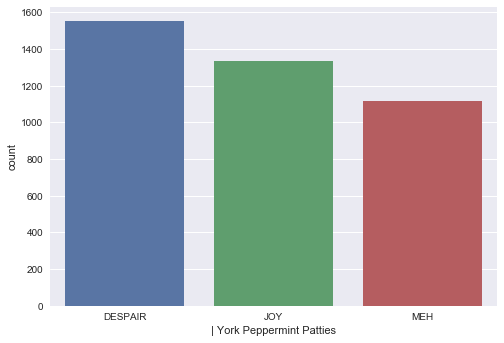

In [109]:
# now lets  vislulaize it 
for i in list:
    sns.countplot(df[i],data=df)
    

# DONE